# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option("display.max_columns", None)

In [2]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv("Marketing_data.csv")
creditcard_df.head()

# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user 
# TENURE: Tenure of credit card service for user

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
# Let's see who made one off purchase of $40761!
creditcard_df.loc[creditcard_df["ONEOFF_PURCHASES"] == 40761.25]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [6]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df.loc[(creditcard_df["CASH_ADVANCE"]).astype(int) == 47137]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

# TASK #3: VISUALIZE AND EXPLORE DATASET

<Axes: >

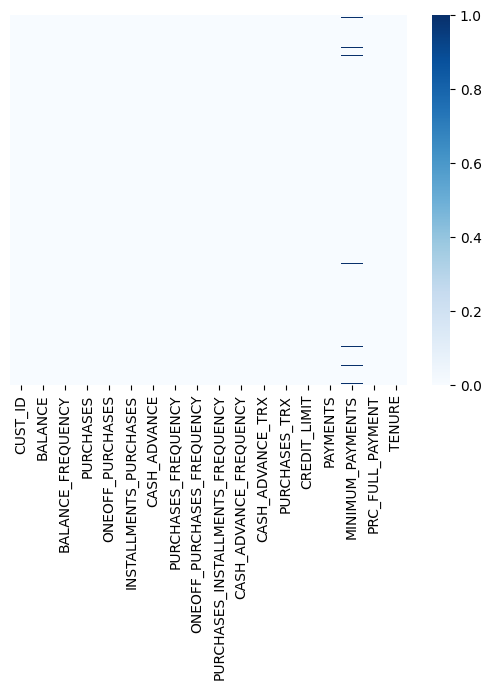

In [7]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cmap="Blues")

In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df["MINIMUM_PAYMENTS"].fillna(creditcard_df["MINIMUM_PAYMENTS"].mean(), inplace = True)

In [10]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df["CREDIT_LIMIT"].fillna(creditcard_df["CREDIT_LIMIT"].mean(), inplace = True)

<Axes: >

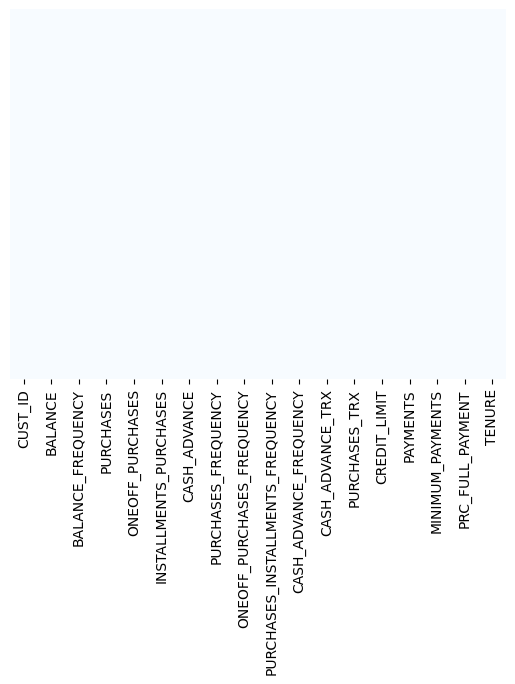

In [11]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cmap="Blues", cbar=False)

In [12]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [13]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis=1, inplace=True)

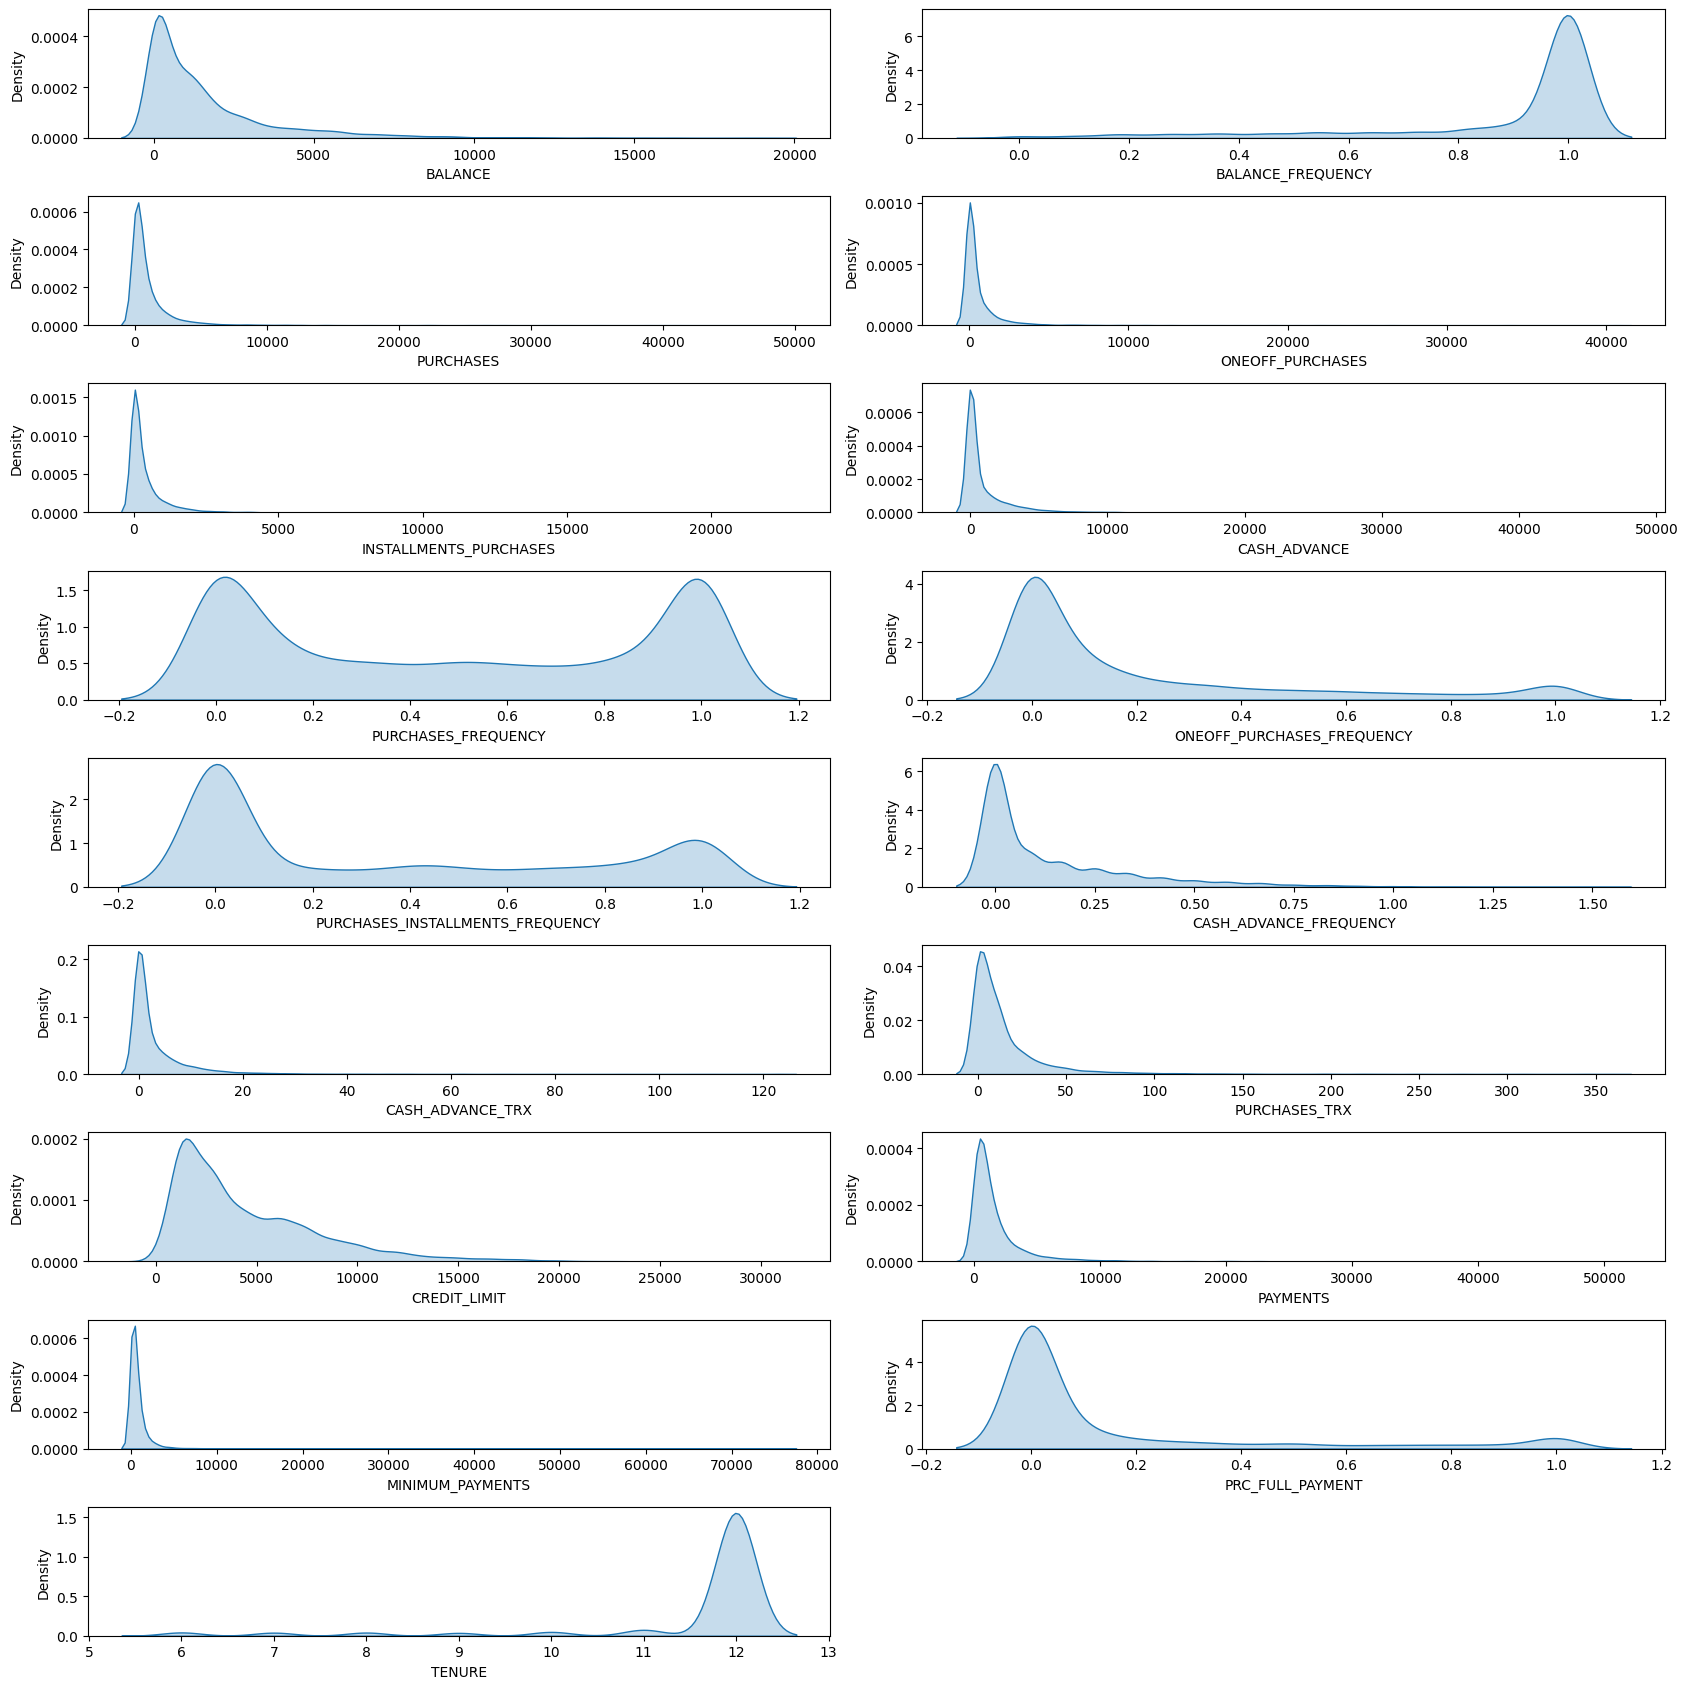

In [14]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

n_col = len(creditcard_df.columns)
plt.figure(figsize=(n_col, n_col))

a = n_col // 2 + 1  # number of rows
b = 2  # number of columns

for i in range(n_col):
    plt.subplot(a, b, i+1)
    sns.kdeplot(creditcard_df[creditcard_df.columns[i]], fill=True)
    # sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True)


plt.tight_layout()
plt.show()

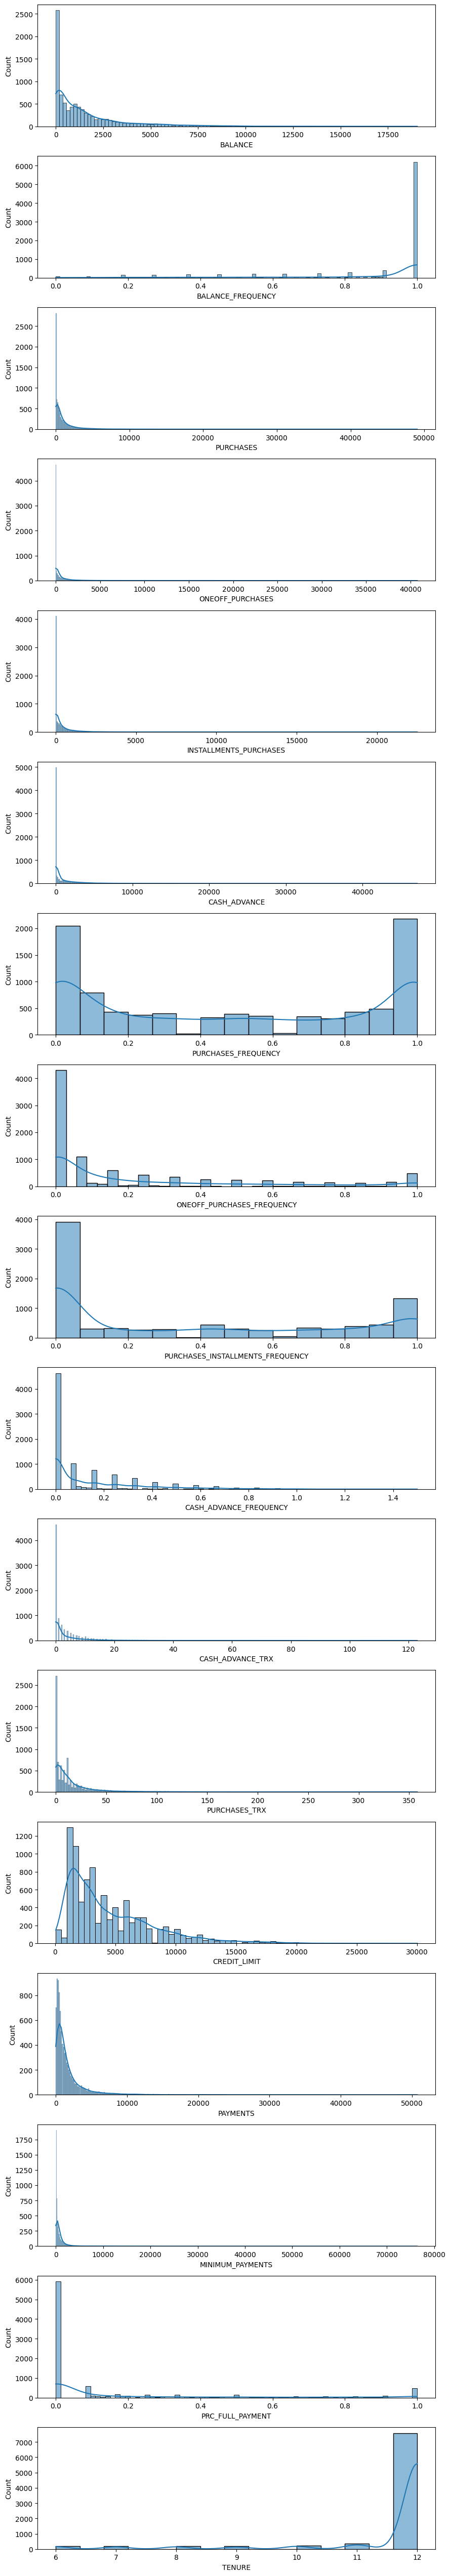

In [15]:
plt.figure(figsize=(n_col // 2 + 1, n_col*3))

for i in range(n_col):
    plt.subplot(n_col, 1, i+1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True)

plt.tight_layout()

# plt.figure(figsize=(10,50))
# for i in range(len(creditcard_df.columns)):
#     plt.subplot(17, 1, i+1)
#     sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
#     plt.title(creditcard_df.columns[i])

# plt.tight_layout()

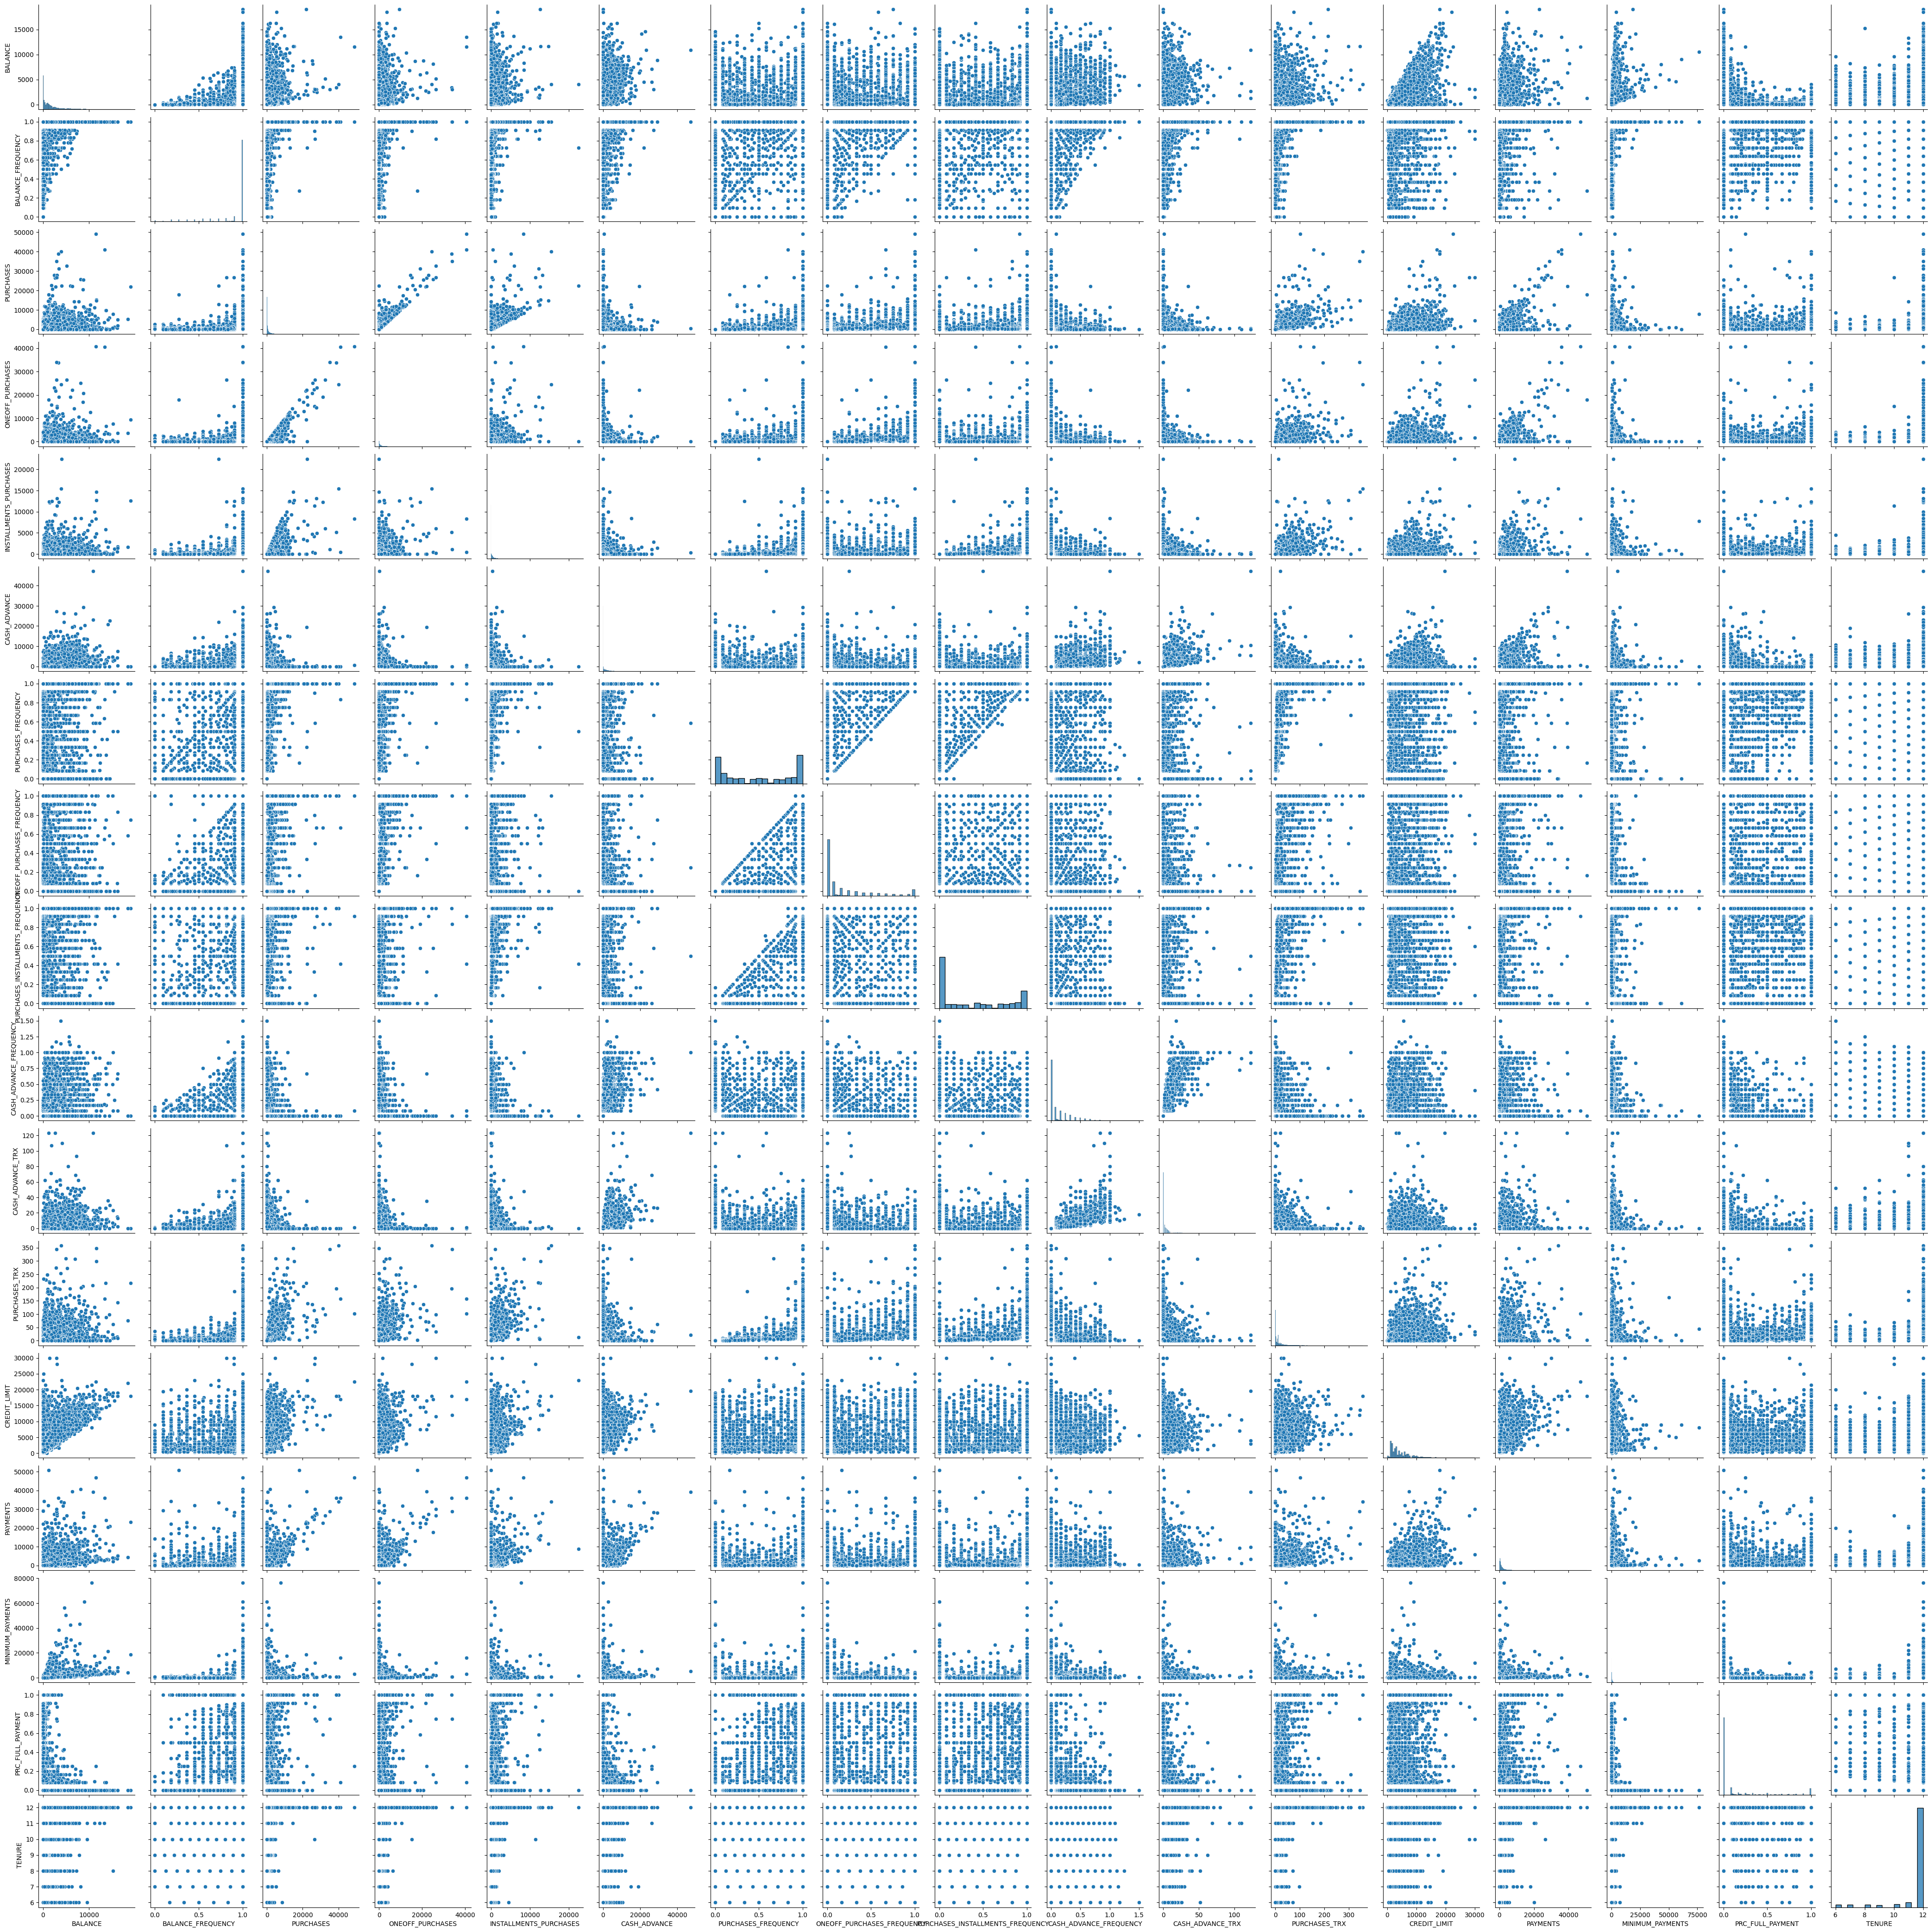

In [16]:
sns.pairplot(creditcard_df)
plt.show()
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

<Axes: >

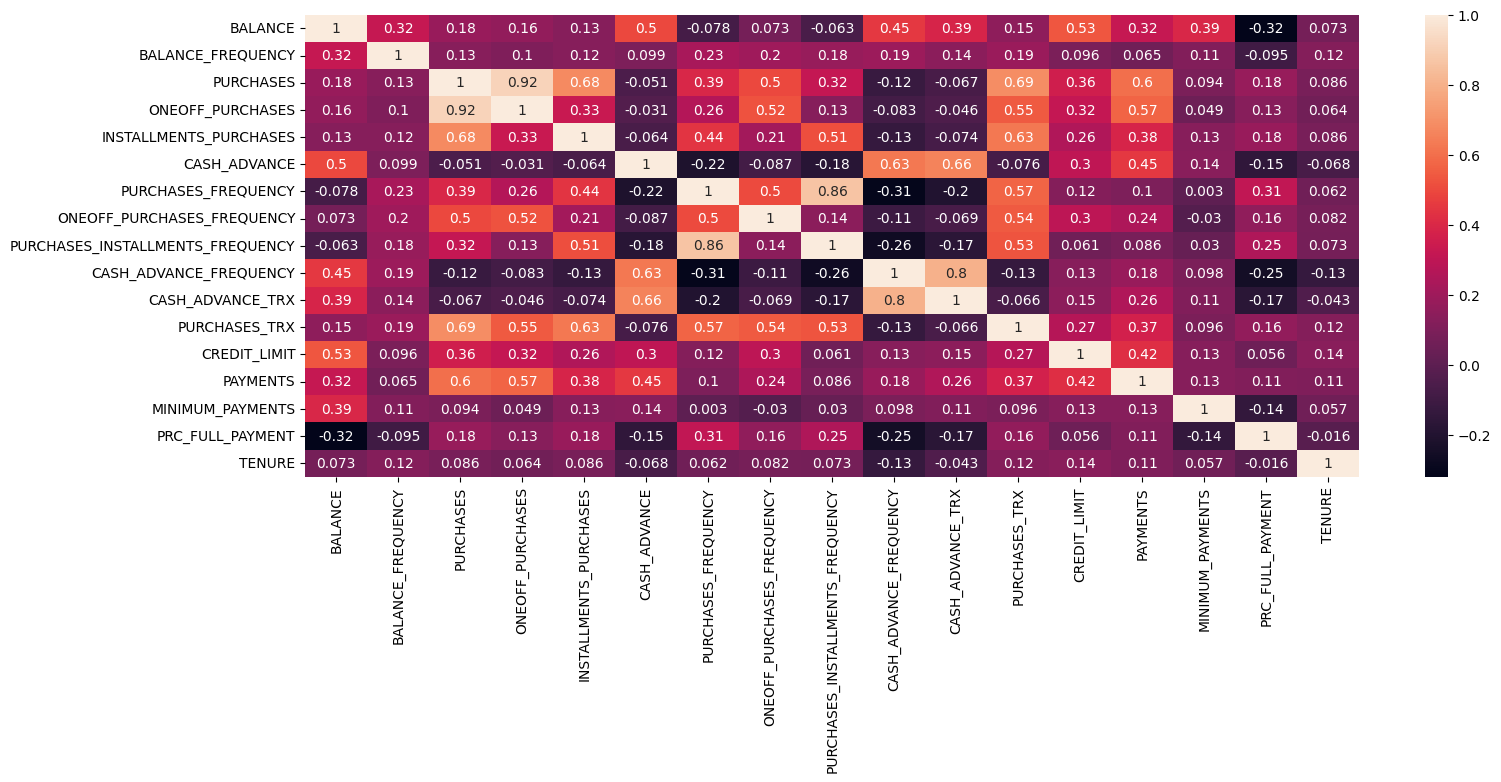

In [17]:
plt.figure(figsize=(n_col, n_col//3 + 1))
corr = creditcard_df.corr()
sns.heatmap(corr, annot=True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [18]:
# Let's scale the data first
ss = StandardScaler()
creditcard_df_scaled = ss.fit_transform(creditcard_df)

In [19]:
creditcard_df_scaled.shape

(8950, 17)

In [20]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

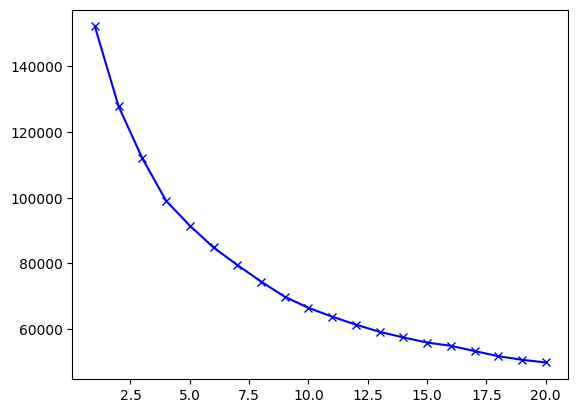

In [21]:
kmeans_scores = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(creditcard_df_scaled)
    kmeans_scores.append(kmeans.inertia_)
    
plt.plot(range(1, 21), kmeans_scores, "bx-", color="blue")

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

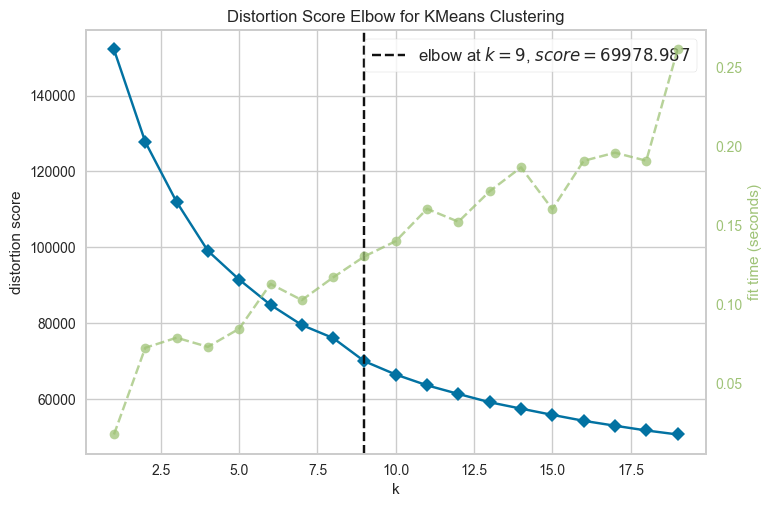

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(creditcard_df_scaled) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

# TASK #6: APPLY K-MEANS METHOD

In [23]:
kmeans = KMeans(6)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
kmeans.cluster_centers_.shape

(6, 17)

In [25]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=creditcard_df.columns)
cluster_centers

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.014519           0.372359  -0.344762         -0.223250   
1 -0.397597           0.307630  -0.067754         -0.245556   
2  1.430238           0.419467   6.915048          6.083034   
3 -0.697844          -2.121553  -0.313038         -0.231015   
4  1.593049           0.377248  -0.209263         -0.151315   
5  0.135764           0.427070   0.920662          0.871351   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.404934     -0.084510            -0.825071   
1                0.290892     -0.365557             0.965905   
2                5.172266      0.038778             1.090699   
3               -0.315659     -0.306912            -0.560037   
4               -0.216897      1.942082            -0.456216   
5                0.576032     -0.310489             1.087581   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.334677                         -0.769903   
1                   -0.377537                          1.140756   
2                    1.879303                          1.049413   
3                   -0.418705                         -0.465064   
4                   -0.189068                         -0.412127   
5                    1.837629                          0.542103   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.128696         -0.030093      -0.470082     -0.335441   
1               -0.461749         -0.357367       0.121926     -0.329743   
2               -0.249227         -0.038166       4.646228      2.198371   
3               -0.484403         -0.357813      -0.425746     -0.209329   
4                1.891066          1.840954      -0.251326      0.962875   
5               -0.406208         -0.319772       1.179387      0.686131   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.262238         -0.031011         -0.450914 -0.006421  
1 -0.251519         -0.056098          0.342248 -0.027872  
2  4.783704          1.080945          0.824001  0.334613  
3 -0.221025         -0.256015          0.261571 -0.165980  
4  0.767242          0.512394         -0.391972 -0.090907  
5  0.372615         -0.025900          0.433674  0.271305

In [26]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = ss.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  1534.254183          0.965479    266.616487       221.888196   
1   736.911171          0.950146    858.446789       184.865097   
2  4541.393882          0.976638  15777.311395     10689.027791   
3   111.971653          0.374694    334.395004       209.000465   
4  4880.272348          0.966637    556.110961       341.286033   
5  1847.055436          0.978440   2970.213437      2038.701416   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              44.891241   801.649932            0.159210   
1             674.117517   212.280294            0.878015   
2            5088.283605  1060.190695            0.928101   
3             125.620931   335.263311            0.265580   
4             214.929959  5051.507613            0.307249   
5             931.966223   327.760354            0.926849   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.102617                         0.058458   
1                   0.089831                         0.817803   
2                   0.763090                         0.781501   
3                   0.077550                         0.179609   
4                   0.146055                         0.200648   
5                   0.750658                         0.579883   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.160898         3.043464      3.025354   3273.976512   
1               0.042744         0.810058     17.740458   3294.710463   
2               0.085271         2.988372    130.197674  12493.023256   
3               0.038210         0.807018      4.127384   3732.825243   
4               0.513566        15.811983      8.462810   7997.783621   
5               0.053858         1.066616     44.024981   6990.876058   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0    973.989267       791.937706         0.021830  11.508726  
1   1005.021829       733.472164         0.253816  11.480018  
2  15581.496801      3383.304083         0.394721  11.965116  
3   1093.299450       267.574608         0.230220  11.295195  
4   3954.234520      2058.320218         0.039069  11.395661  
5   2811.828267       803.847691         0.280557  11.880394

In [27]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 5, 3, ..., 0, 2, 2])

In [28]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({"cluster": labels})], axis=1)
creditcard_df_cluster


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        4  
2      622.066742        627.284787          0.000000      12        5  
3        0.000000        864.206542          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        1  
89

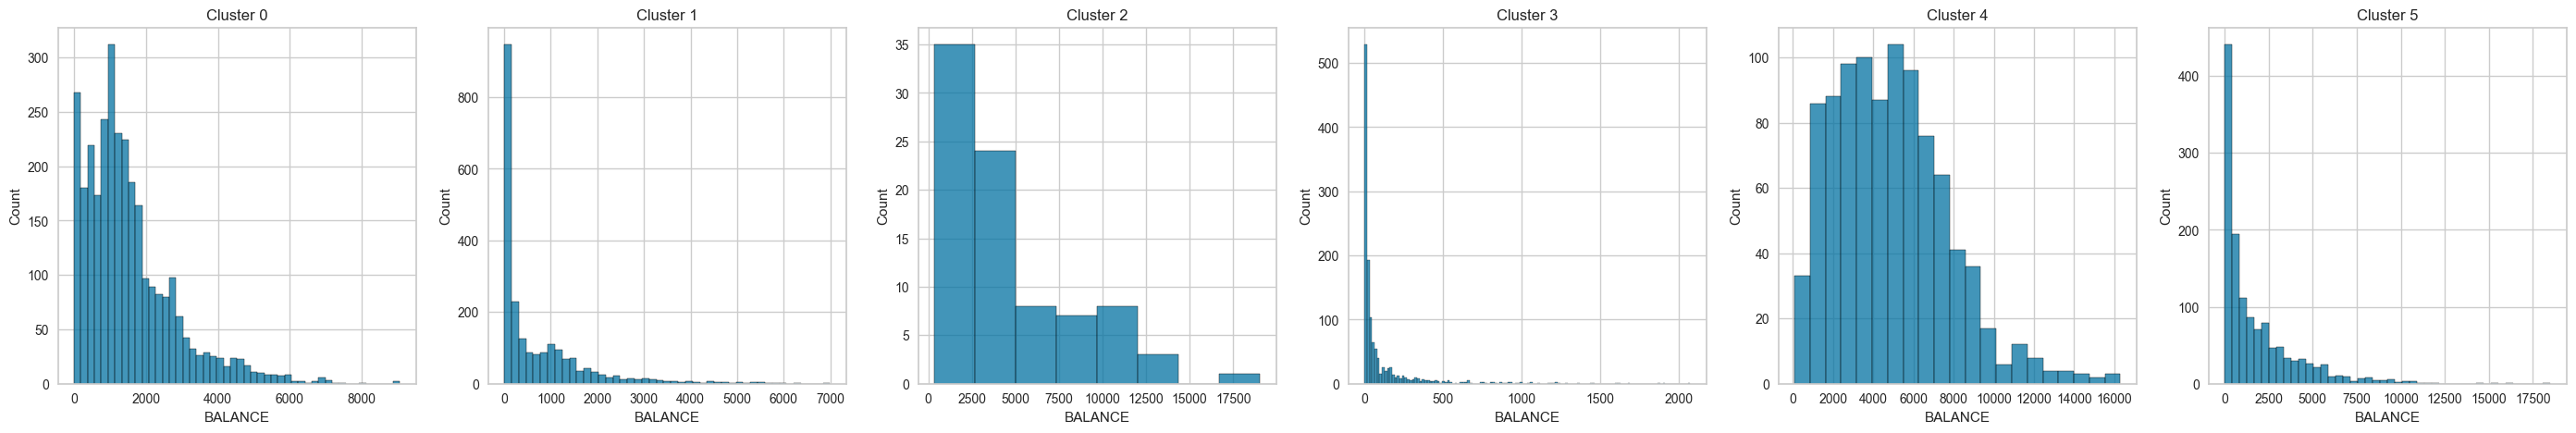

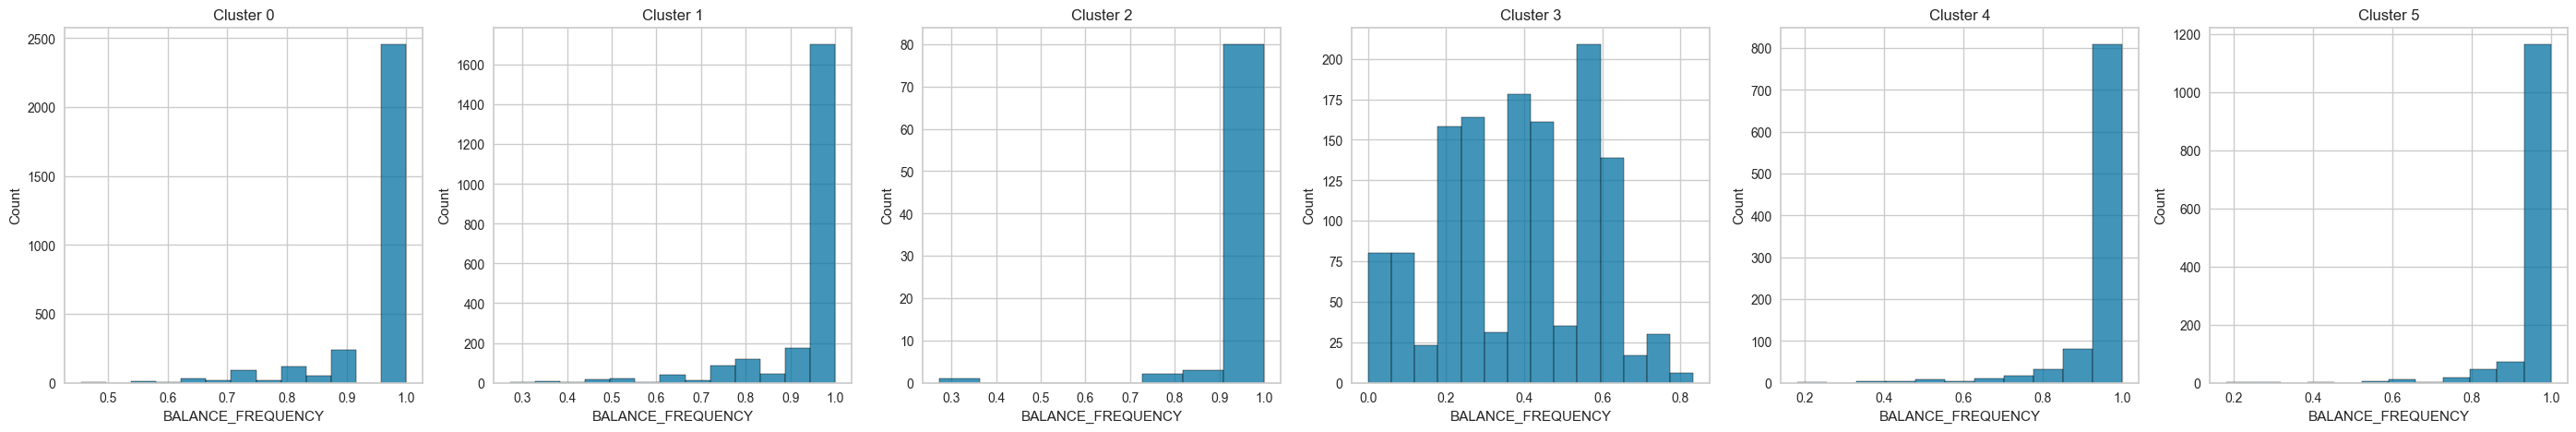

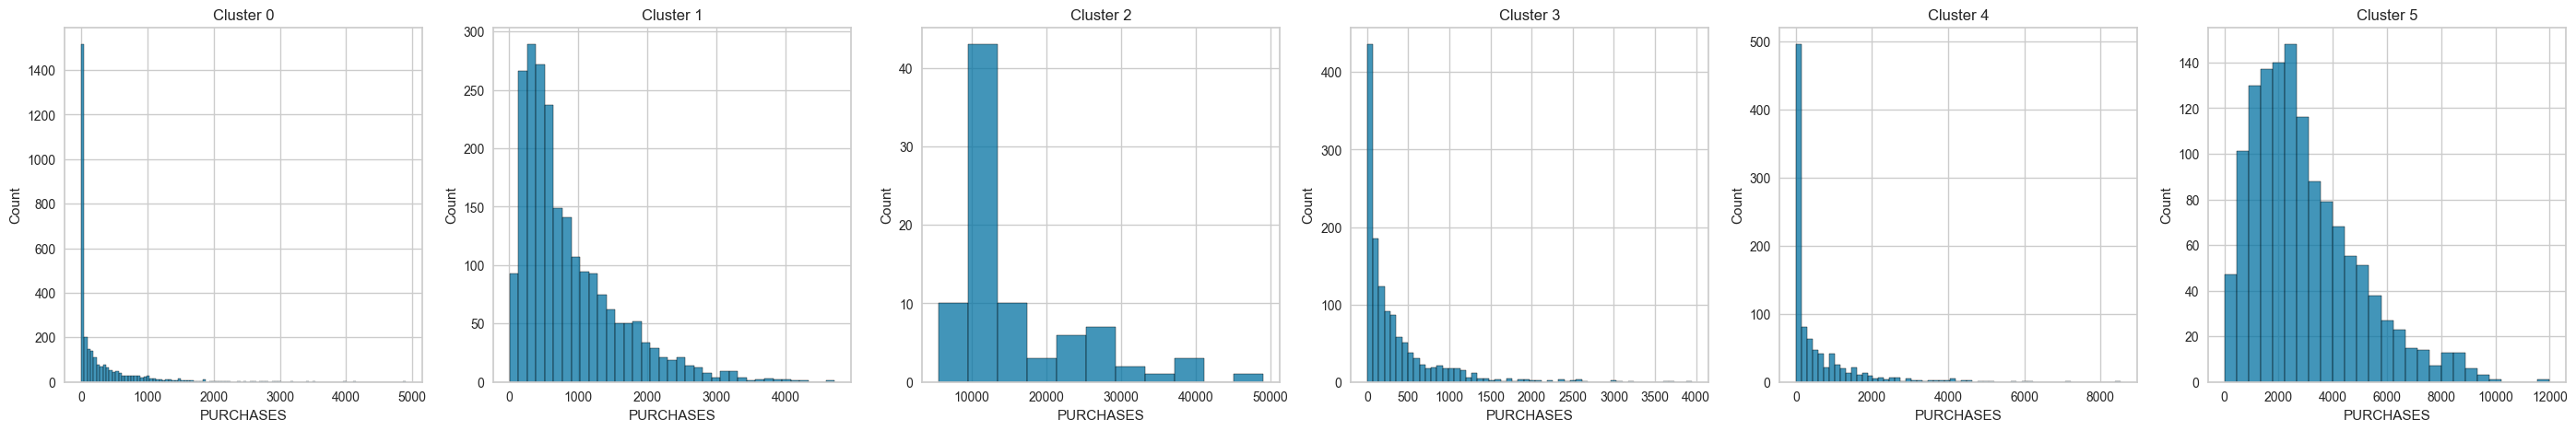

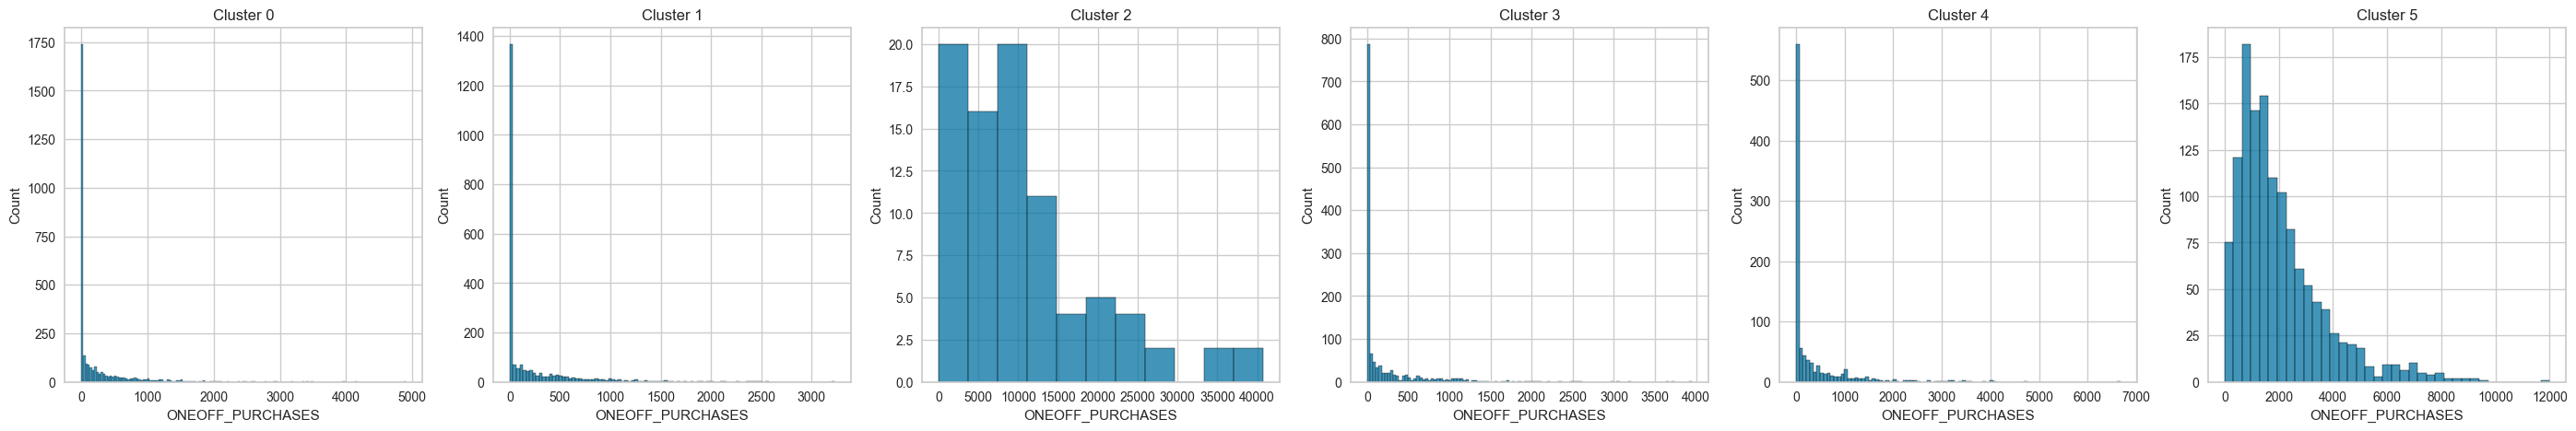

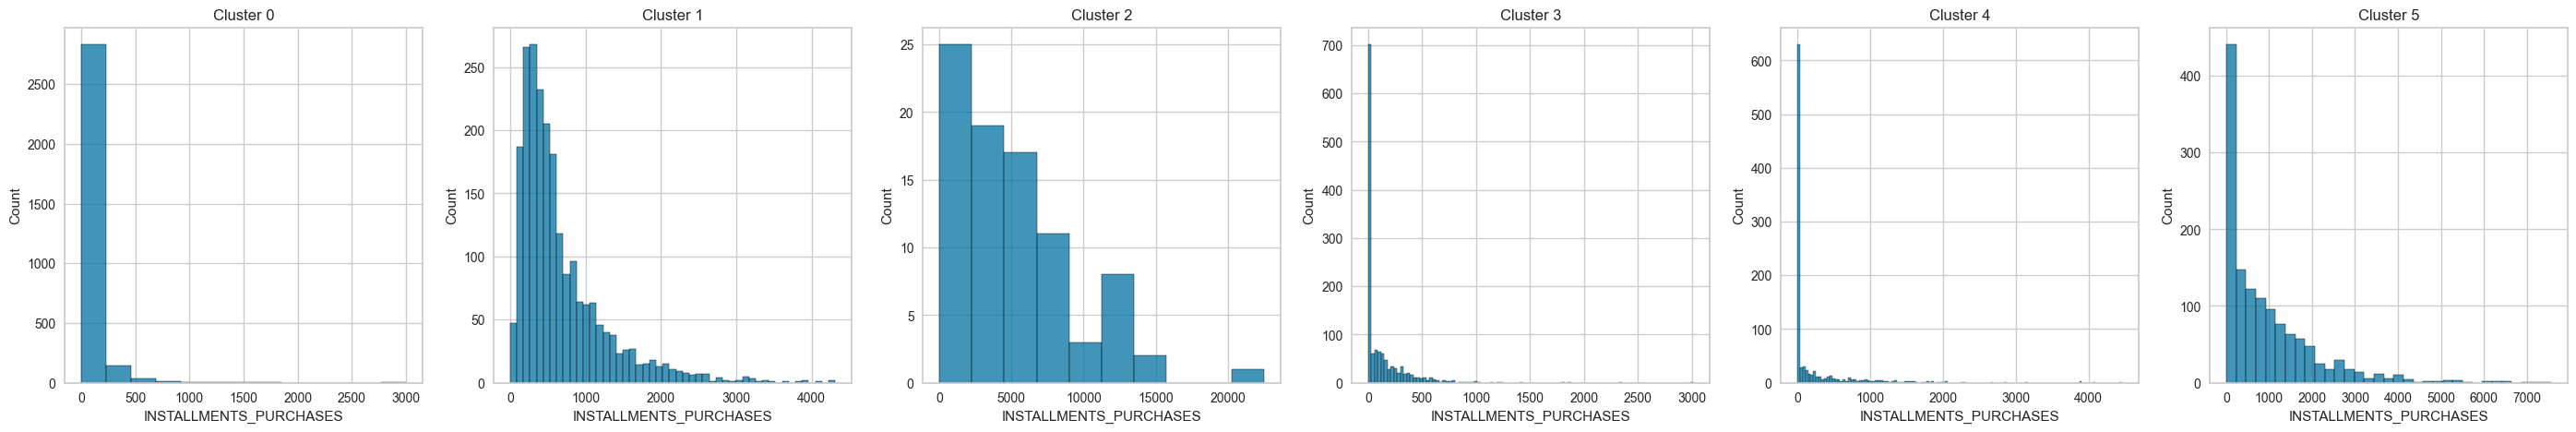

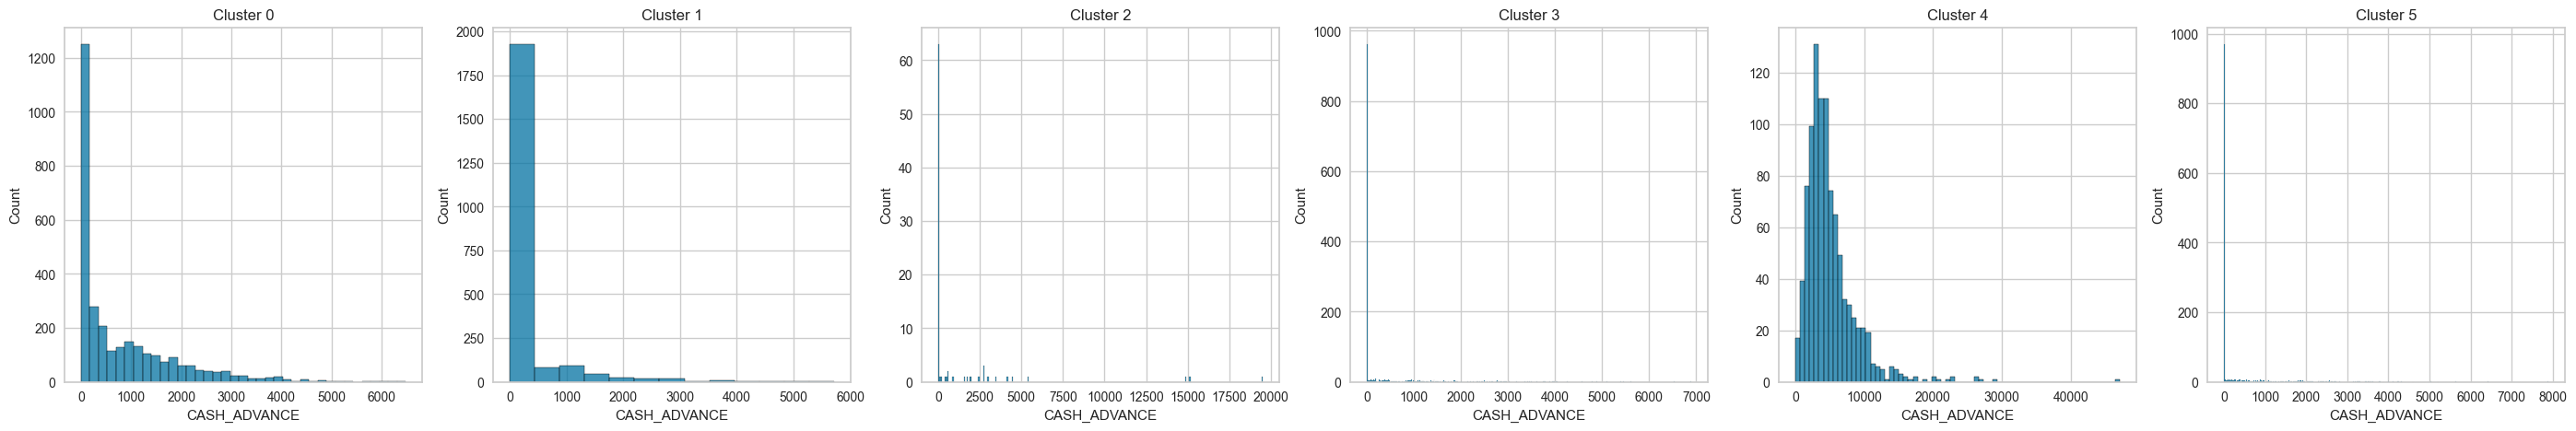

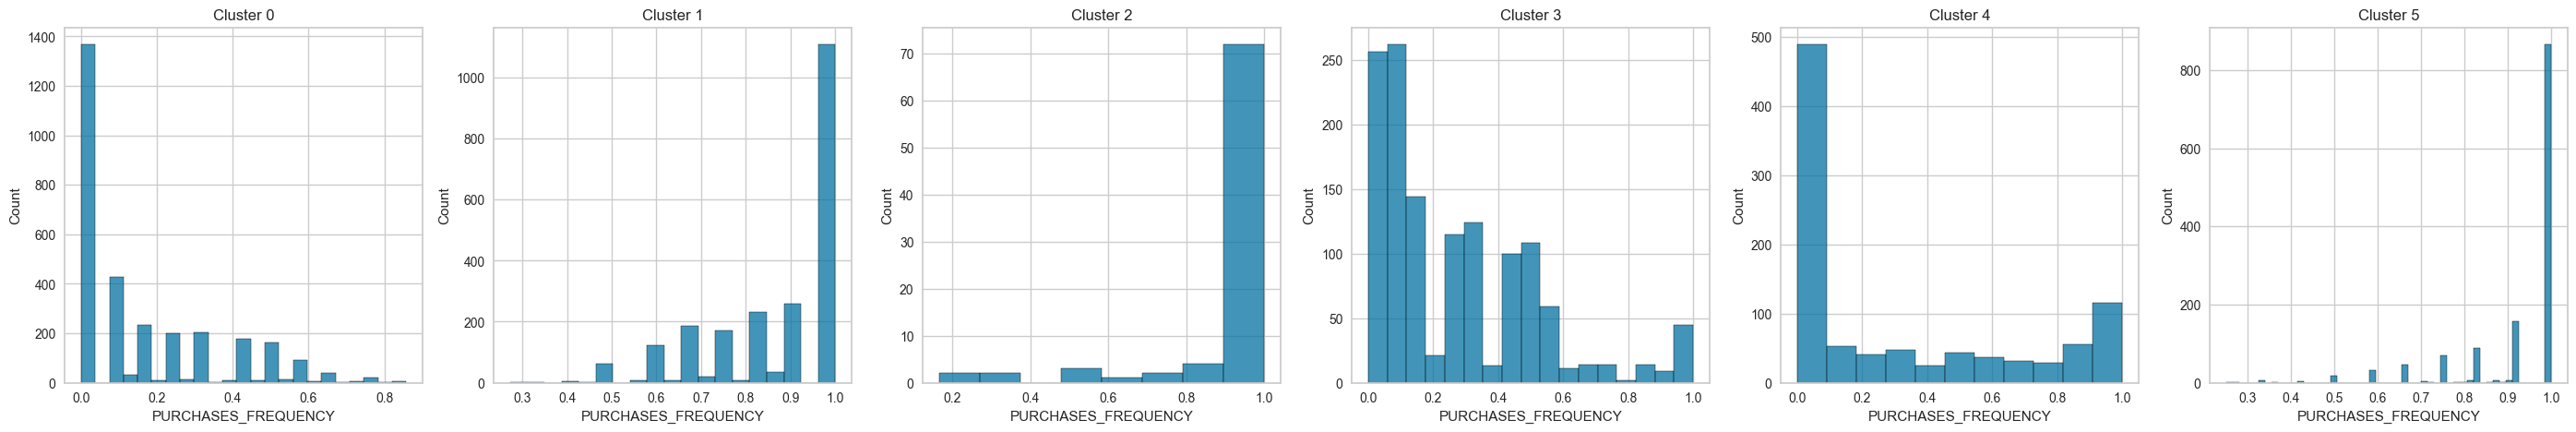

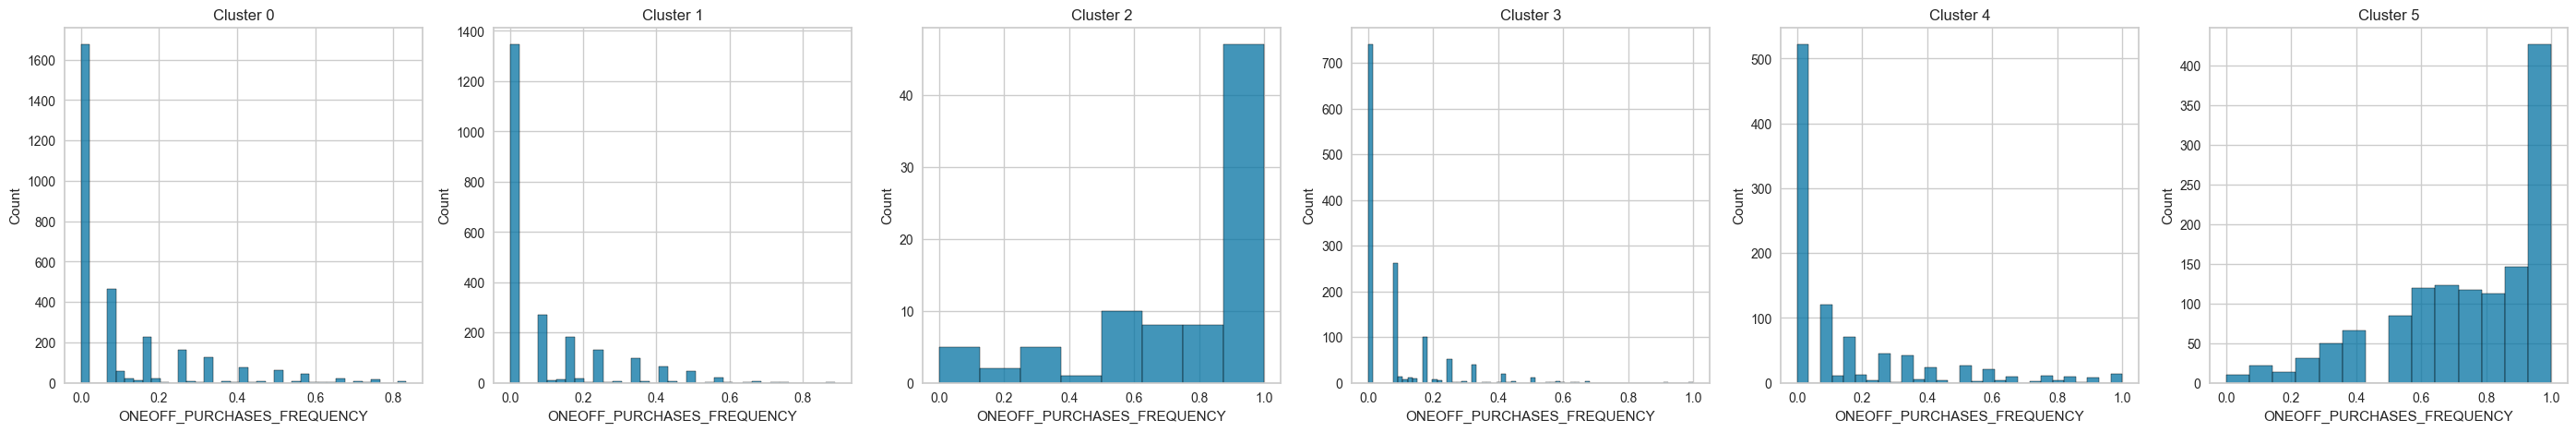

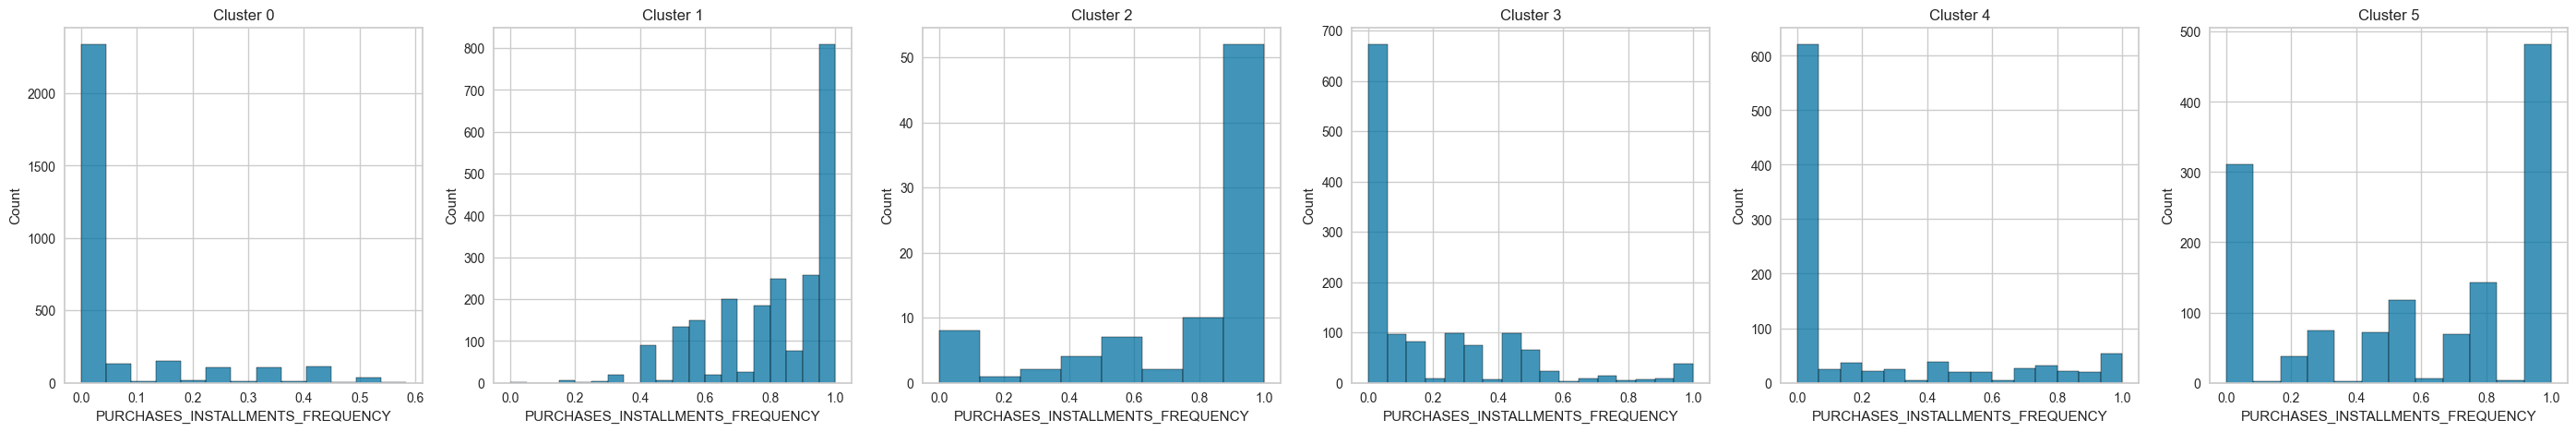

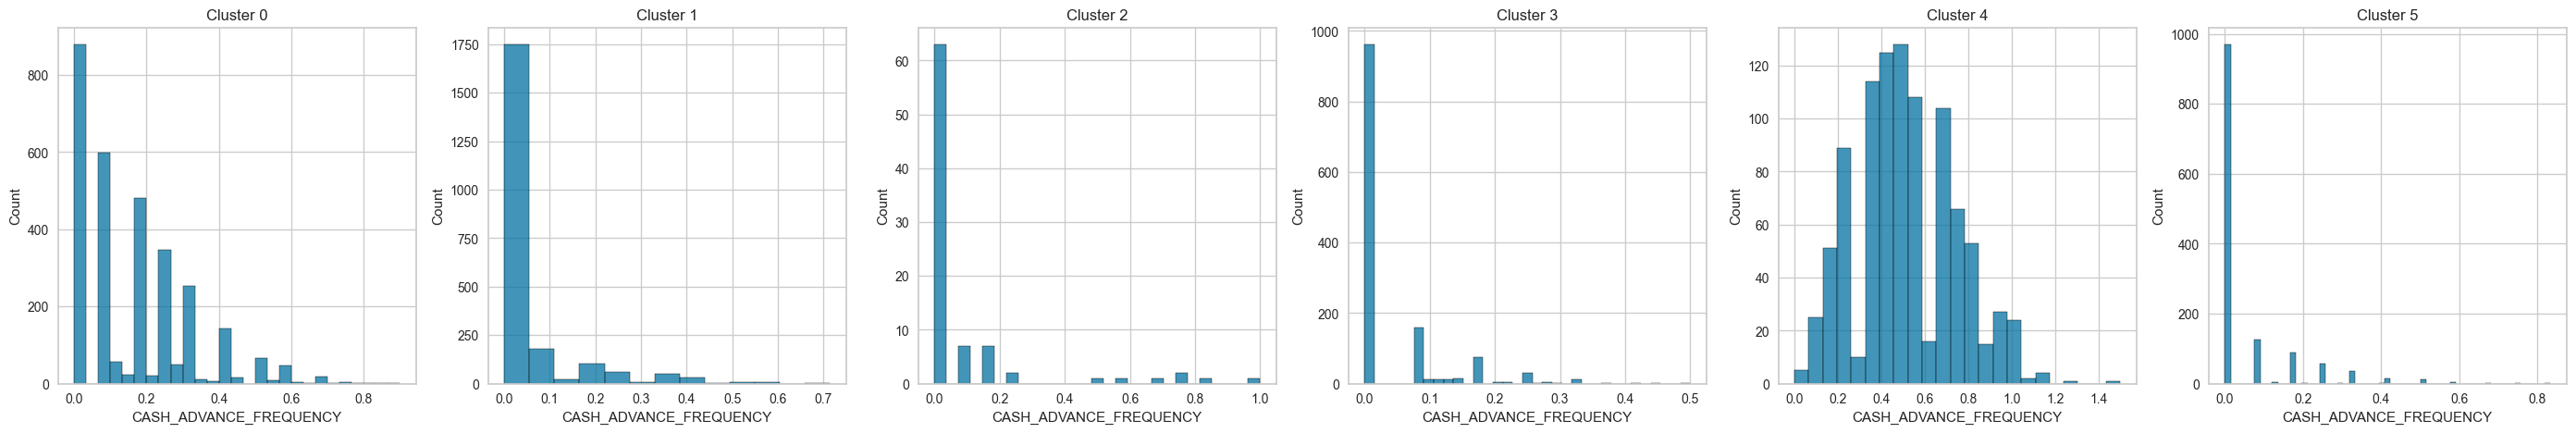

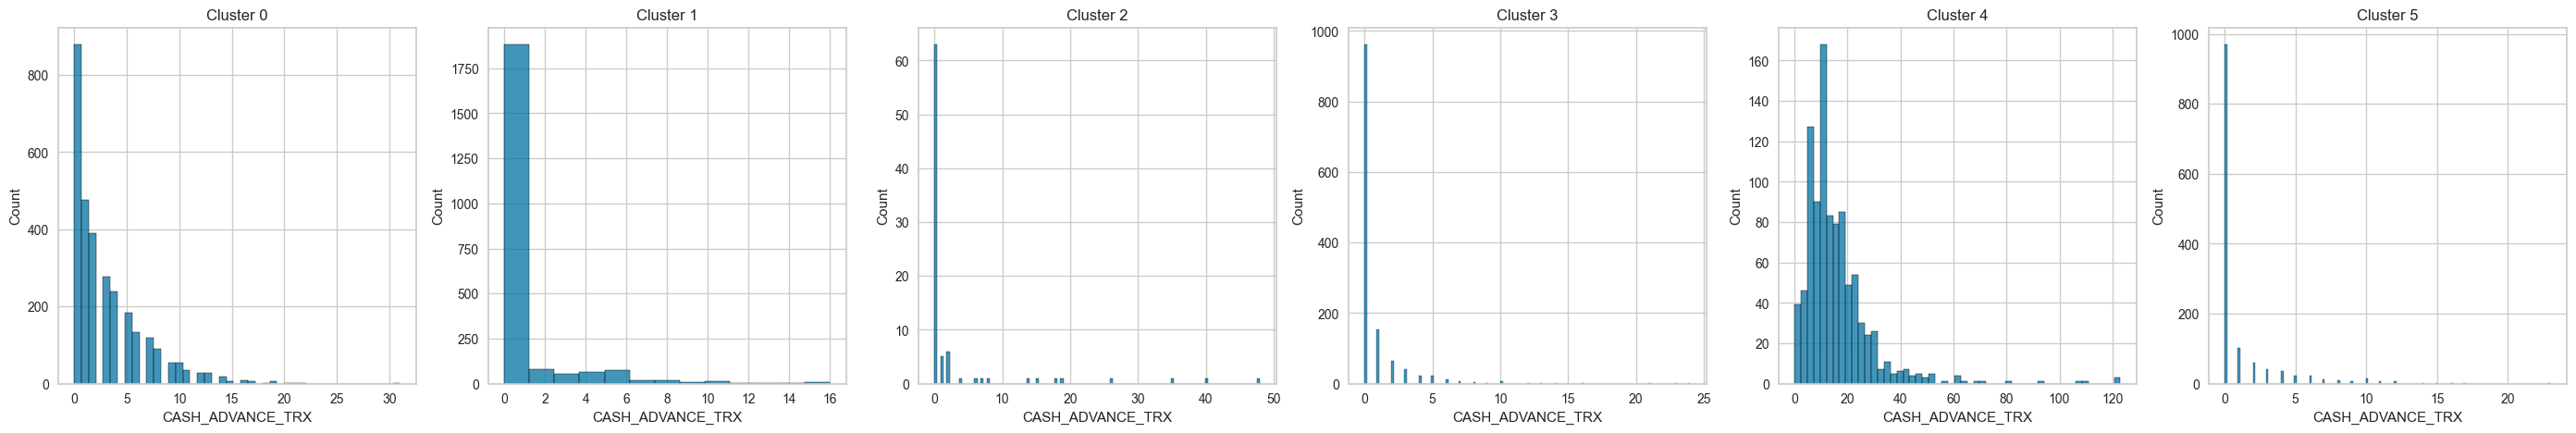

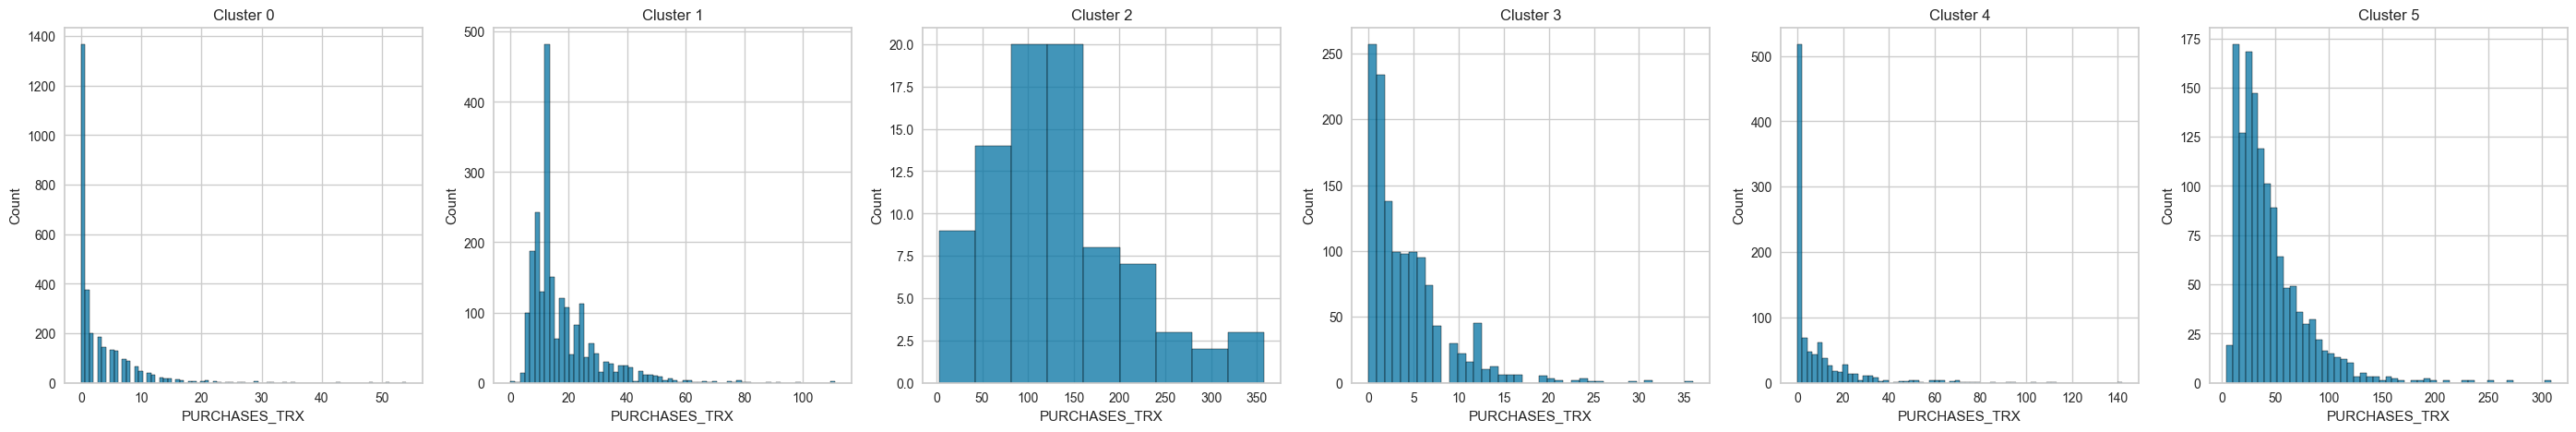

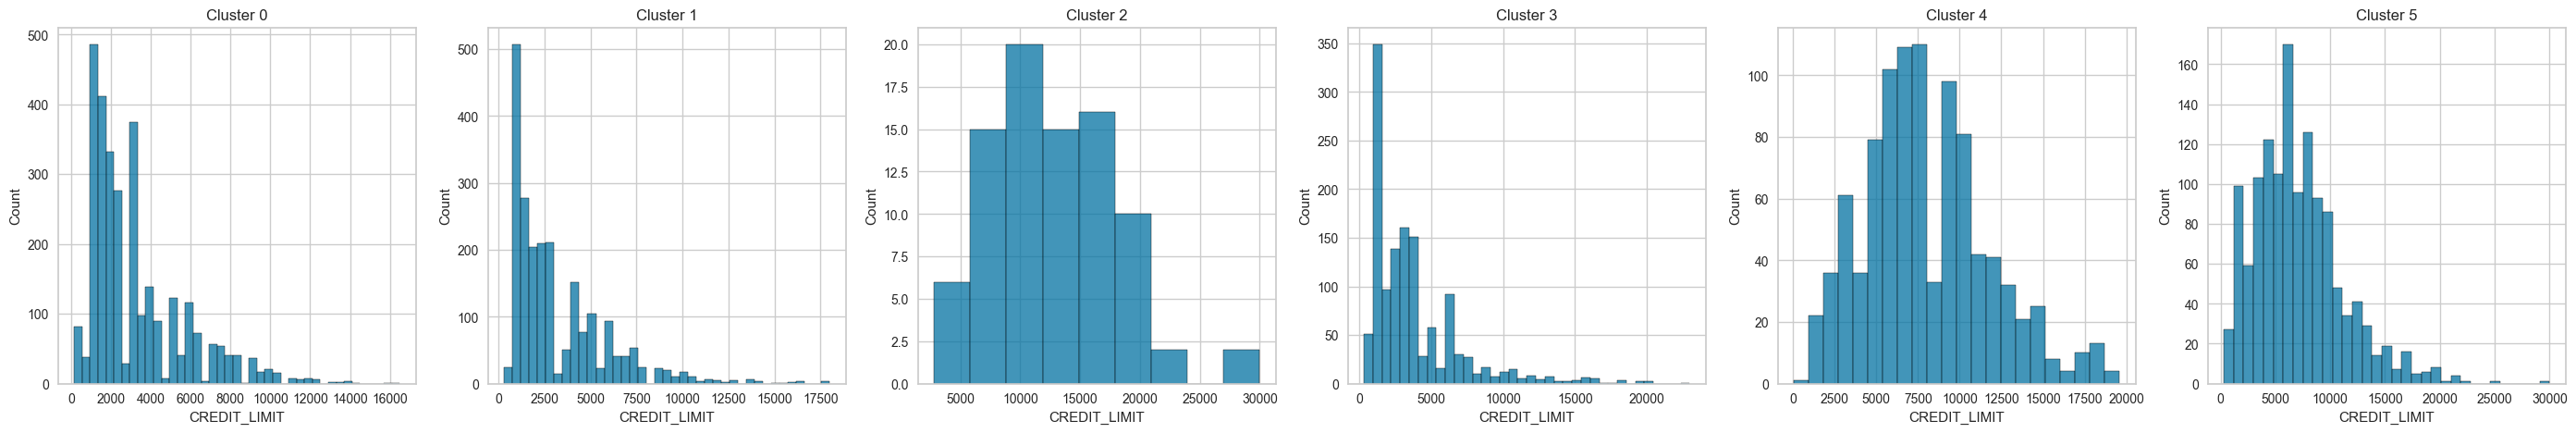

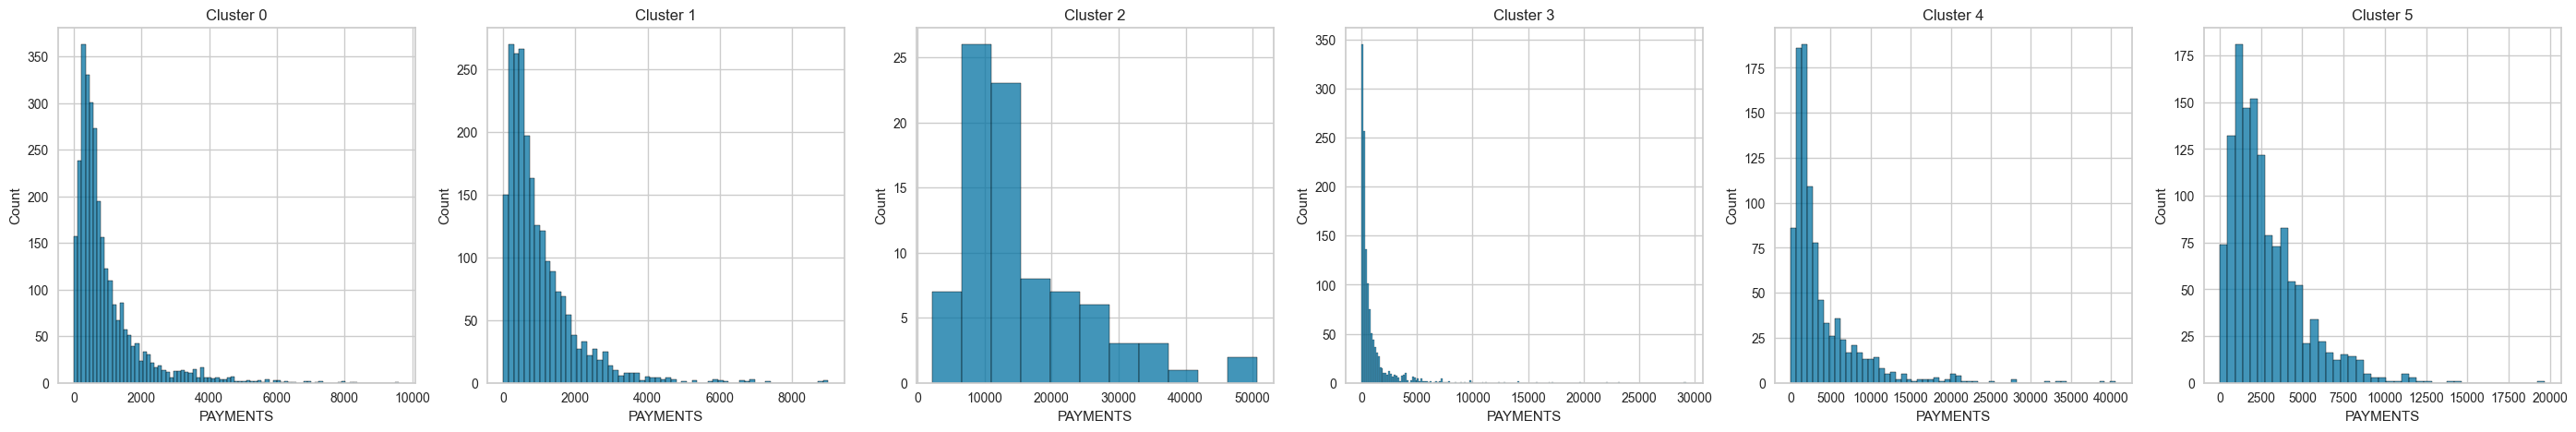

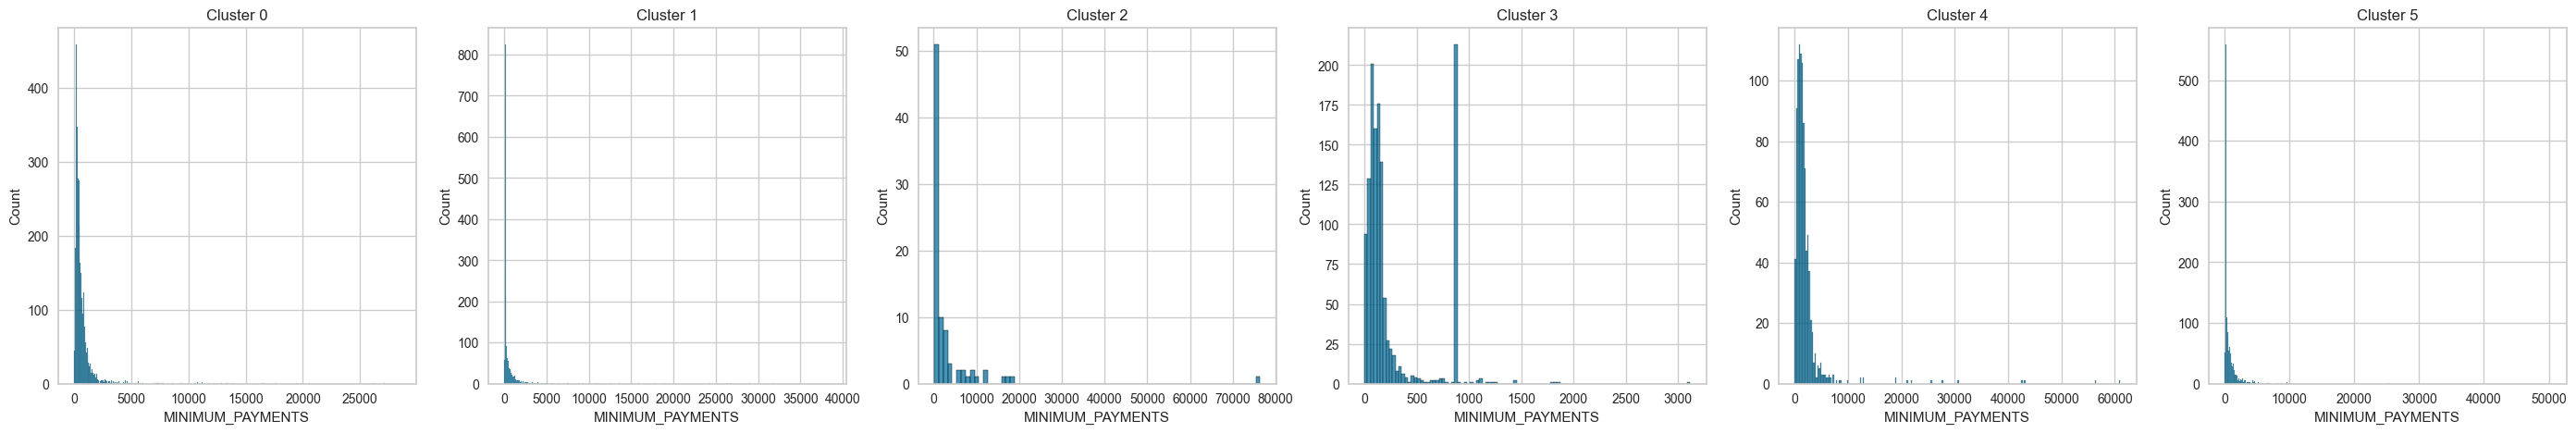

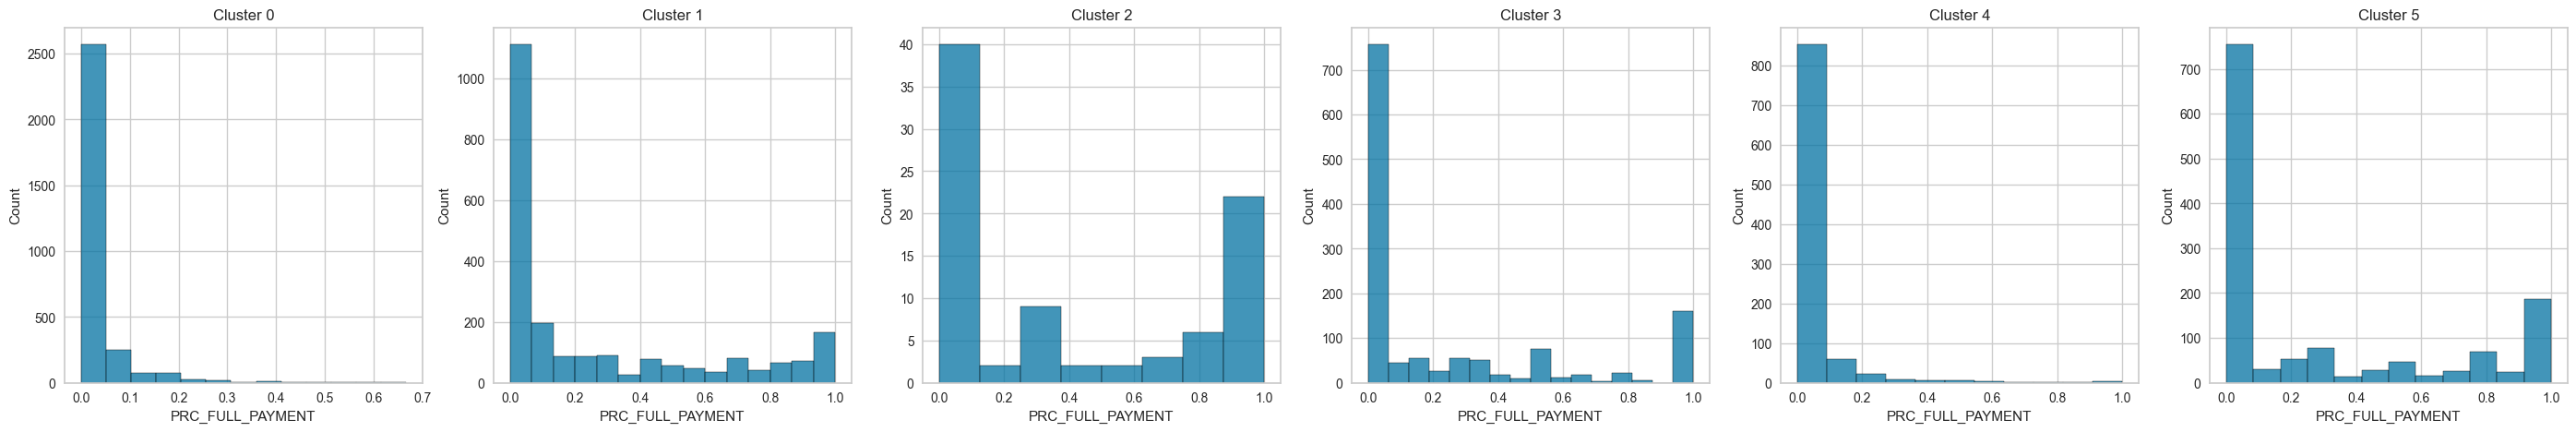

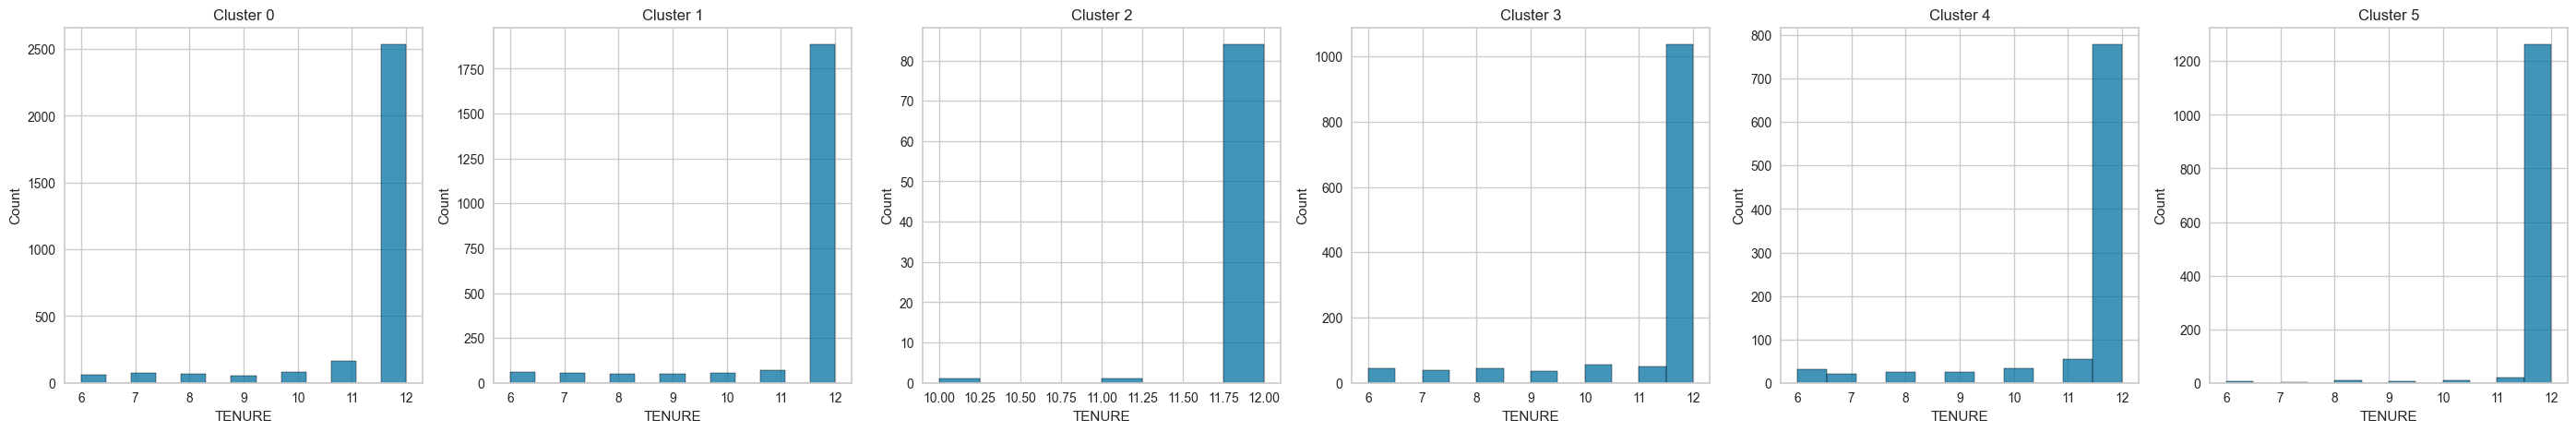

In [29]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(6):
        plt.subplot(1, 6, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        sns.histplot(cluster[i])
        # cluster[i].hist(bins = 20)
        plt.title(f'Cluster {j}')
    plt.show()


# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [30]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(creditcard_df_scaled)
principal_components

array([[-1.68222281, -1.07645086],
       [-1.13830692,  2.50647109],
       [ 0.96969039, -0.38352554],
       ...,
       [-0.92620202, -1.81078445],
       [-2.33655104, -0.65796076],
       [-0.55641731, -0.40046492]])

In [31]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(principal_components, columns=["pca1", "pca2"])
pca_df

pca1      pca2
0    -1.682223 -1.076451
1    -1.138307  2.506471
2     0.969690 -0.383526
3    -0.873632  0.043169
4    -1.599435 -0.688582
...        ...       ...
8945 -0.359627 -2.016146
8946 -0.564367 -1.639115
8947 -0.926202 -1.810784
8948 -2.336551 -0.657961
8949 -0.556417 -0.400465

[8950 rows x 2 columns]

In [32]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

pca1      pca2  cluster
0    -1.682223 -1.076451        0
1    -1.138307  2.506471        4
2     0.969690 -0.383526        5
3    -0.873632  0.043169        0
4    -1.599435 -0.688582        0
...        ...       ...      ...
8945 -0.359627 -2.016146        1
8946 -0.564367 -1.639115        1
8947 -0.926202 -1.810784        1
8948 -2.336551 -0.657961        0
8949 -0.556417 -0.400465        0

[8950 rows x 3 columns]

C:\Users\batu_\AppData\Local\Temp\ipykernel_10124\1127798869.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])


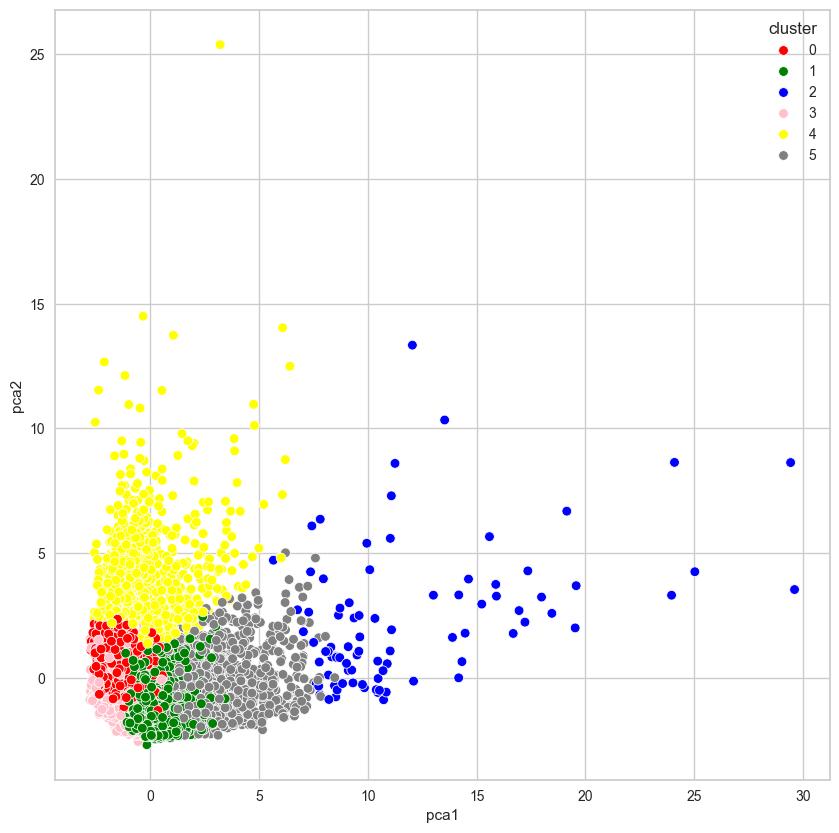

In [33]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [35]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [36]:
encoding_dim = 7
input_df = Input(shape=(17,))

x = Dense(encoding_dim, activation="relu")(input_df)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(x)

encoded = Dense(10, activation="relu", kernel_initializer="glorot_uniform")(x)

x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(encoded)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)

decoded = Dense(17, kernel_initializer="glorot_uniform")(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [37]:
creditcard_df_scaled.shape

(8950, 17)

In [38]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128,
                epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 2s 17ms/step - loss: 0.5924
Epoch 2/25
70/70 [==============================] - 1s 18ms/step - loss: 0.3396
Epoch 3/25
70/70 [==============================] - 1s 17ms/step - loss: 0.2410
Epoch 4/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1841
Epoch 5/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1635
Epoch 6/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1403
Epoch 7/25
70/70 [==============================] - 1s 18ms/step - loss: 0.1259
Epoch 8/25
70/70 [==============================] - 1s 18ms/step - loss: 0.1262
Epoch 9/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1105
Epoch 10/25
70/70 [==============================] - 1s 17ms/step - loss: 0.0962
Epoch 11/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1014
Epoch 12/25
70/70 [==============================] - 1s 17ms/step - loss: 0.0919
Epoch 13/25
70/70 [==================

In [43]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [39]:
autoencoder.save_weights('autoencoder.h5')

In [40]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 3ms/step


In [41]:
pred.shape

(8950, 10)

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

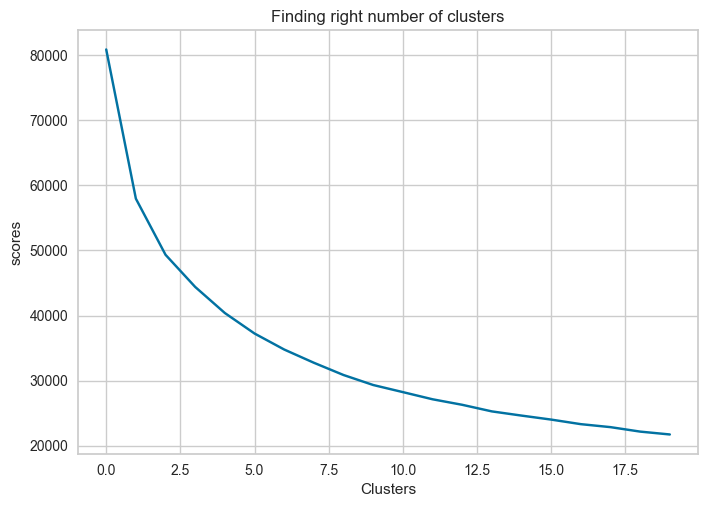

In [45]:
scores_2 = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

C:\Users\batu_\AppData\Local\Temp\ipykernel_10124\1306335473.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(kmeans_scores, 'bx-', color = 'r')
C:\Users\batu_\AppData\Local\Temp\ipykernel_10124\1306335473.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


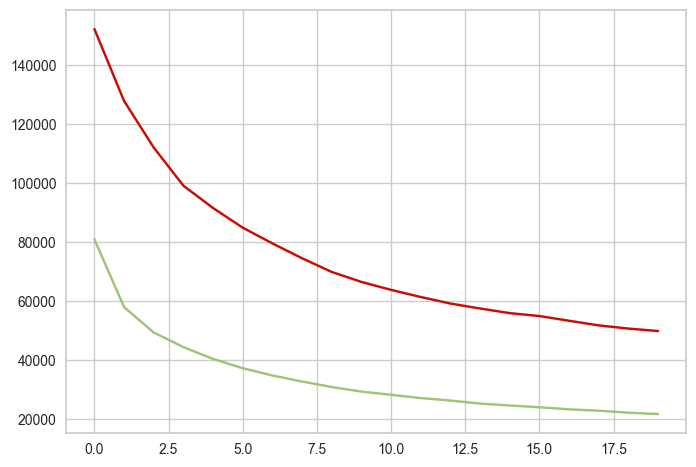

In [47]:
plt.plot(kmeans_scores, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

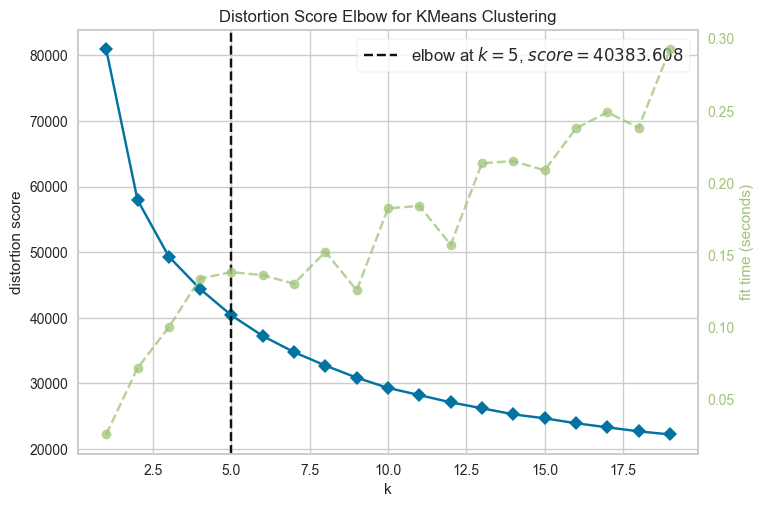

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(pred) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [49]:
kmeans = KMeans(5)
kmeans.fit(pred)

labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [50]:
labels

array([0, 2, 0, ..., 2, 2, 2])

In [51]:
y_kmeans

array([3, 1, 2, ..., 4, 3, 3])

In [52]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({"labels": labels})], axis=1)
df_cluster_dr

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  labels  
0      201.802084        139.509787          0.000000      12       0  
1     4103.032597       1072.340217          0.222222      12       2  
2      622.066742        627.284787          0.000000      12       0  
3        0.000000        864.206542          0.000000      12       2  
4      678.334763        244.791237          0.000000      12       0  
...           ...               ...               ...     ...     ...  
8945   325.594462         48.886365          0.500000       6       0  
8946   275

In [53]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(prin_comp, columns=["pca1", "pca2"])
pca_df

pca1      pca2
0    -1.884405 -0.233538
1     1.817972 -1.182581
2    -0.621392  0.680478
3    -0.406467 -0.384158
4    -1.764389 -0.428406
...        ...       ...
8945 -0.575097  0.471736
8946 -0.449655  0.133707
8947 -0.483904  0.202363
8948 -0.366626 -0.486738
8949  1.086846 -0.198091

[8950 rows x 2 columns]

In [54]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.884405 -0.233538        0
1  1.817972 -1.182581        2
2 -0.621392  0.680478        0
3 -0.406467 -0.384158        2
4 -1.764389 -0.428406        0

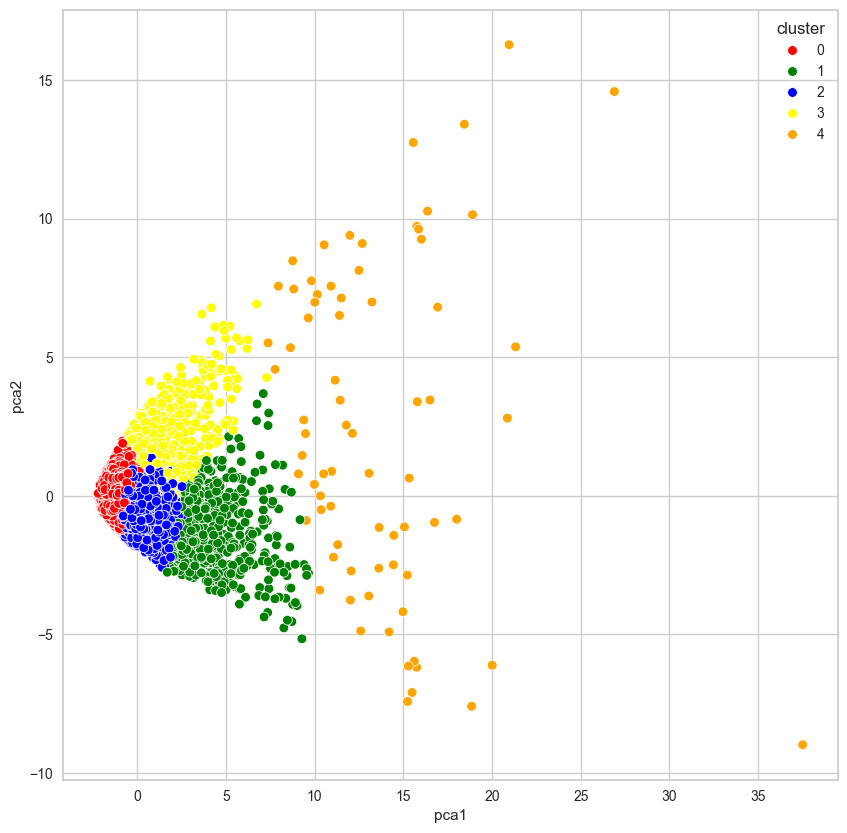

In [57]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow',"orange"])
plt.show()

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS